# Import the Libraries

In [1]:
import os
import plotly
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

# Load Dataset

In [2]:
os.chdir("A:\DATA\Imartics\MLP05")
df =pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Exploratory data analysis

1. Title : Diamonds Dataset


2. the 7th column "price" is the values to be predicted.


3. Data Type : Mixed ( Numerical + Categorical)

	
4. Dataset has nearly 54000 instances.


5. It has 10 features.


6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)
    

7. Caution : Handle Categorical data before building a model. 


In [3]:
dfp=ProfileReport(df,title="Diamonds")
dfp.to_notebook_iframe()

In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<AxesSubplot:>

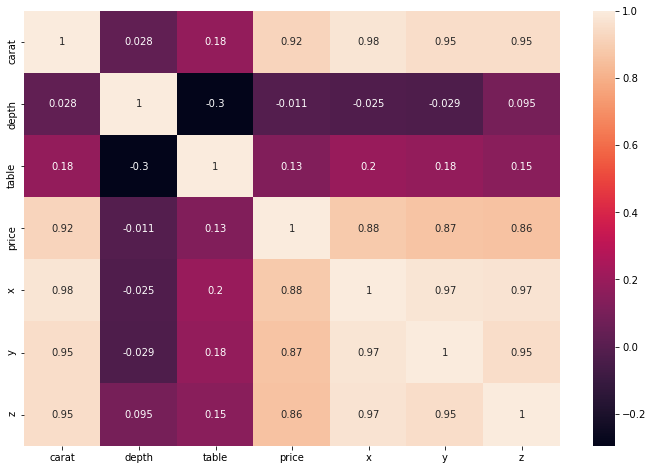

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

# Handle Categorical Columns With LabelEncoding 

In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
le = preprocessing.LabelEncoder()

In [9]:
df['cut']= le.fit_transform(df['cut'])
df['color']= le.fit_transform(df['color'])
df['clarity']= le.fit_transform(df['clarity'])

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


# Normalise the data

In [11]:
from sklearn.preprocessing import Normalizer

In [12]:
scaler=Normalizer().fit(df)
nd=scaler.transform(df)
nd=pd.DataFrame(nd,index=df.index,columns=df.columns)
print(nd)

          carat       cut     color   clarity     depth     table     price  \
0      0.000684  0.005946  0.002973  0.008919  0.182843  0.163518  0.969214   
1      0.000623  0.008900  0.002967  0.005933  0.177406  0.180966  0.967132   
2      0.000680  0.002956  0.002956  0.011824  0.168193  0.192136  0.966593   
3      0.000841  0.008700  0.014499  0.014499  0.180953  0.168193  0.968562   
4      0.000896  0.002891  0.017343  0.008672  0.182970  0.167650  0.968324   
...         ...       ...       ...       ...       ...       ...       ...   
53935  0.000261  0.000725  0.000000  0.000725  0.022043  0.020665  0.999538   
53936  0.000261  0.000363  0.000000  0.000725  0.022877  0.019940  0.999534   
53937  0.000254  0.001450  0.000000  0.000725  0.022767  0.021752  0.999498   
53938  0.000312  0.001088  0.001450  0.001088  0.022115  0.021027  0.999526   
53939  0.000272  0.000725  0.000000  0.001088  0.022550  0.019940  0.999541   

              x         y         z  
0      0.0117

In [13]:
nd.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.000684,0.005946,0.002973,0.008919,0.182843,0.163518,0.969214,0.011744,0.011833,0.007225
1,0.000623,0.008900,0.002967,0.005933,0.177406,0.180966,0.967132,0.011540,0.011392,0.006853
2,0.000680,0.002956,0.002956,0.011824,0.168193,0.192136,0.966593,0.011972,0.012031,0.006828
3,0.000841,0.008700,0.014499,0.014499,0.180953,0.168193,0.968562,0.012180,0.012267,0.007627
4,0.000896,0.002891,0.017343,0.008672,0.182970,0.167650,0.968324,0.012545,0.012574,0.007949


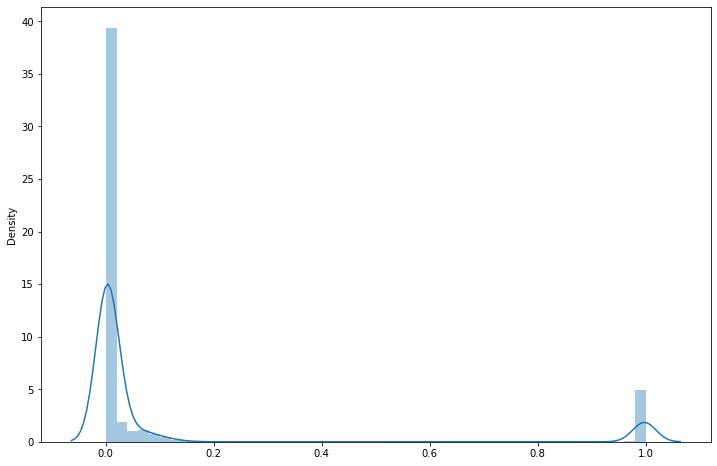

In [14]:
plt.figure(figsize=(12,8))
sns.distplot(nd)
plt.show()

# Spliting the data - Test and Train (recommended 75:25 split)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x =  nd.drop("price", axis = 1).values
y = nd["price"].values
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=0)

In [17]:
x

array([[0.0006838 , 0.0059461 , 0.00297305, ..., 0.01174355, 0.01183274,
        0.00722451],
       [0.000623  , 0.00889999, 0.00296666, ..., 0.01154032, 0.01139199,
        0.00685299],
       [0.00067987, 0.00295594, 0.00295594, ..., 0.01197157, 0.01203069,
        0.00682823],
       ...,
       [0.00025377, 0.00145012, 0.        , ..., 0.00205192, 0.00205918,
        0.00129061],
       [0.00031179, 0.00108762, 0.00145016, ..., 0.00222963, 0.00221875,
        0.0013559 ],
       [0.00027191, 0.00072509, 0.        , ..., 0.00211365, 0.00212815,
        0.00131967]])

In [18]:
y

array([0.96921423, 0.96713214, 0.96659315, ..., 0.99949773, 0.99952613,
       0.99954057])

In [19]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(40455, 9) (40455,)
(13485, 9) (13485,)


# Building KNN Algorithm from scratch and Making Predictions

In [20]:
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,20): 
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(x_train, y_train)
    score.append(clf.score(x_test, y_test )) 

# Evaluating our model

In [21]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 6, Max Accuracy = 99.98204964522905


In [22]:
clf = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance', p=1)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test ))   
y_pred = clf.predict(x_test)

0.9998204964522905


# Training a model using sklearn KNN Algorithm and compare it with our scratch implementation

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [24]:
using_model = KNeighborsRegressor( n_neighbors = 3 ) 
    
using_model.fit( x_train, y_train )

KNeighborsRegressor(n_neighbors=3)

In [25]:
y_pred = using_model.predict( x_test )

In [26]:
print('accuracy of model with sklearn model',r2_score(y_test,y_pred))

accuracy of model with sklearn model 0.9998498909321591
